<a href="https://colab.research.google.com/github/Vane-Zavala/Intento-5/blob/main/Puntualidad_de_las_aerol%C3%ADneas_y_causas_de_retrasos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar librerías esenciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Esto permite que los gráficos se muestren dentro del notebook
%matplotlib inline


In [ ]:
# Definir la ruta completa del archivo
file_path = '/content/DelayedFlights.csv'

# Cargar el dataset
df = pd.read_csv(file_path)

# Mostrar las primeras 5 filas para verificar la carga
print(df.head())


   Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
0   2211.0        2225            WN  ...     4.0     8.0          0   
1   1002.0        1000            WN  ...     5.0    10.0          0   
2    804.0         750            WN  ...     3.0    17.0          0   
3   1959.0        1925            WN  ...     3.0    10.0          0   
4   2121.0        2110            WN  ...     4.0    10.0          0   

   CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0                 N         0           NaN         

In [ ]:
# Visualizar información general del DataFrame
df.info()

# Estadísticas descriptivas de las columnas numéricas
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

Preprocesamiento y Limpieza de Datos (Crear una Columna de Fecha)

In [ ]:
# Renombrar las columnas y crear la columna de fecha
df['FlightDate'] = pd.to_datetime(
    df[['Year', 'Month', 'DayofMonth']].rename(
        columns={'Year': 'year', 'Month': 'month', 'DayofMonth': 'day'}
    )
)

# Visualizar las primeras filas para confirmar
print(df[['Year', 'Month', 'DayofMonth', 'FlightDate']].head())


   Year  Month  DayofMonth FlightDate
0  2008      1           3 2008-01-03
1  2008      1           3 2008-01-03
2  2008      1           3 2008-01-03
3  2008      1           3 2008-01-03
4  2008      1           3 2008-01-03


Identificar valores nulos y Rellenar los valores nulos

In [ ]:
# Verificar valores nulos en el dataset
print(df.isnull().sum())


Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
FlightDate                0
dtype: int64


In [ ]:
# Rellenar columnas con pocos valores nulos con la mediana de cada una
df['ArrTime'].fillna(df['ArrTime'].median(), inplace=True)
df['TailNum'].fillna('Unknown', inplace=True)
df['CRSElapsedTime'].fillna(df['CRSElapsedTime'].median(), inplace=True)
df['TaxiOut'].fillna(df['TaxiOut'].median(), inplace=True)

# Rellenar con 0 las columnas relacionadas con retrasos
delay_columns = ['ActualElapsedTime', 'AirTime', 'ArrDelay',
                 'CarrierDelay', 'WeatherDelay', 'NASDelay',
                 'SecurityDelay', 'LateAircraftDelay']
df[delay_columns] = df[delay_columns].fillna(0)

# Verificar que no queden valores nulos
print(df.isnull().sum())


<ipython-input-32-ef9cfdb87077>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ArrTime'].fillna(df['ArrTime'].median(), inplace=True)
<ipython-input-32-ef9cfdb87077>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Unnamed: 0              0
Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime                 0
CRSDepTime              0
ArrTime                 0
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum                 0
ActualElapsedTime       0
CRSElapsedTime          0
AirTime                 0
ArrDelay                0
DepDelay                0
Origin                  0
Dest                    0
Distance                0
TaxiIn               7110
TaxiOut                 0
Cancelled               0
CancellationCode        0
Diverted                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
FlightDate              0
dtype: int64


In [ ]:
# Rellenar valores nulos de columnas específicas con la mediana
df = df.copy()  # Asegura que no haya advertencias por modificación en copia
df.update(df[['ArrTime', 'CRSElapsedTime', 'TaxiOut']].fillna(df.median(numeric_only=True)))

# Rellenar valores nulos en 'TailNum' con 'Unknown'
df['TailNum'] = df['TailNum'].fillna('Unknown')

# Rellenar con 0 las columnas relacionadas con retrasos
delay_columns = ['ActualElapsedTime', 'AirTime', 'ArrDelay',
                 'CarrierDelay', 'WeatherDelay', 'NASDelay',
                 'SecurityDelay', 'LateAircraftDelay', 'TaxiIn']
df[delay_columns] = df[delay_columns].fillna(0)

# Verificar que no queden valores nulos
print(df.isnull().sum())


Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
FlightDate           0
dtype: int64


Análisis de las aerolíneas con más retrasos. Vamos a ver qué aerolíneas tienen más retrasos en la llegada (ArrDelay).

<ipython-input-34-d61fb75e3d1e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_delays.index, y=airline_delays.values, palette="Blues_r")


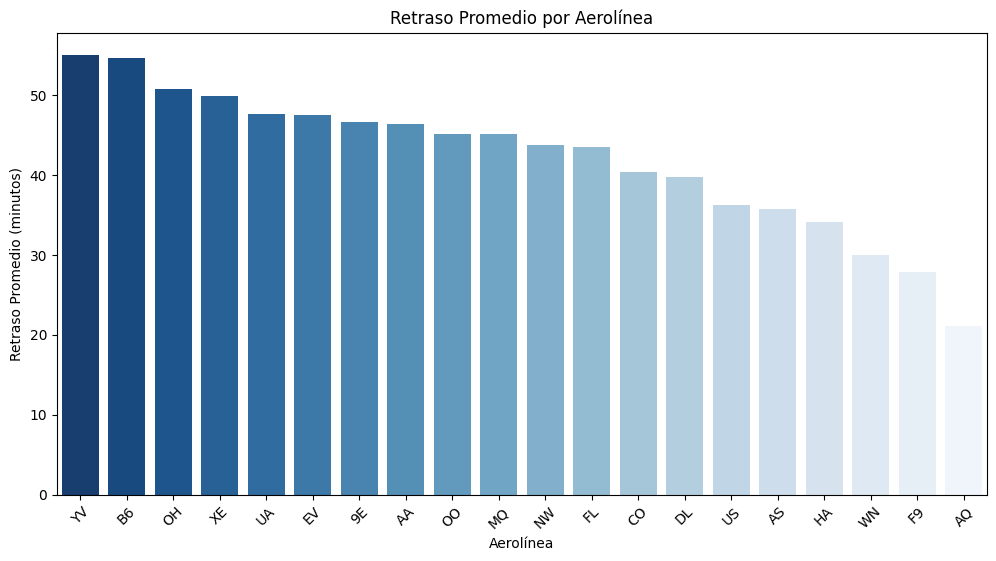

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por aerolínea y calcular el retraso promedio
airline_delays = df.groupby('UniqueCarrier')['ArrDelay'].mean().sort_values(ascending=False)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x=airline_delays.index, y=airline_delays.values, palette="Blues_r")
plt.xlabel("Aerolínea")
plt.ylabel("Retraso Promedio (minutos)")
plt.title("Retraso Promedio por Aerolínea")
plt.xticks(rotation=45)
plt.show()


Análisis de aeropuertos con más retrasos. Ahora analizamos los aeropuertos con más retrasos en llegada (ArrDelay).

<ipython-input-35-7b4d450a3359>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airport_delays.index, y=airport_delays.values, palette="Reds_r")


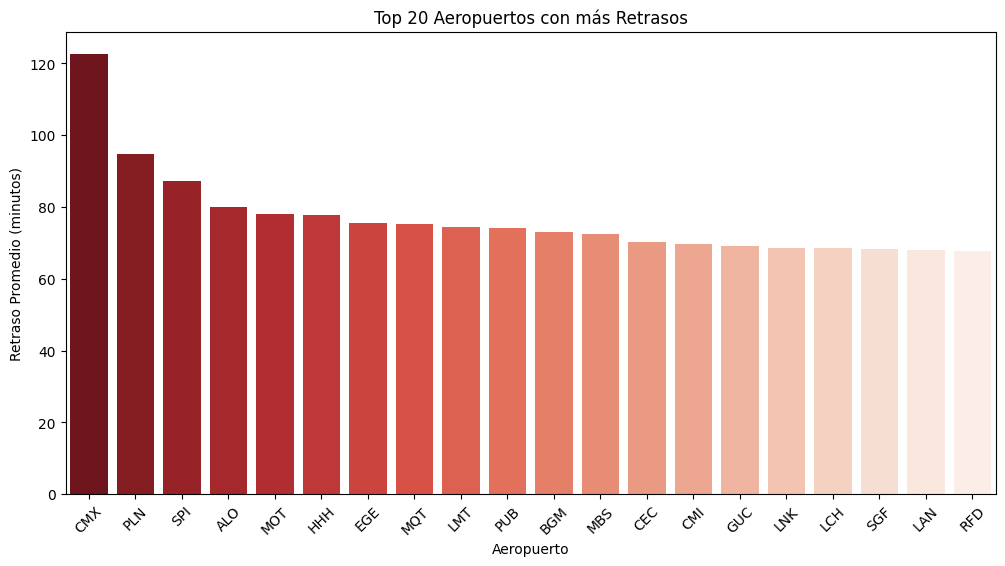

In [ ]:
# Agrupar por aeropuerto de origen y calcular el retraso promedio
airport_delays = df.groupby('Origin')['ArrDelay'].mean().sort_values(ascending=False).head(20)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x=airport_delays.index, y=airport_delays.values, palette="Reds_r")
plt.xlabel("Aeropuerto")
plt.ylabel("Retraso Promedio (minutos)")
plt.title("Top 20 Aeropuertos con más Retrasos")
plt.xticks(rotation=45)
plt.show()


Análisis de retrasos por mes. En qué meses ocurren más retrasos.

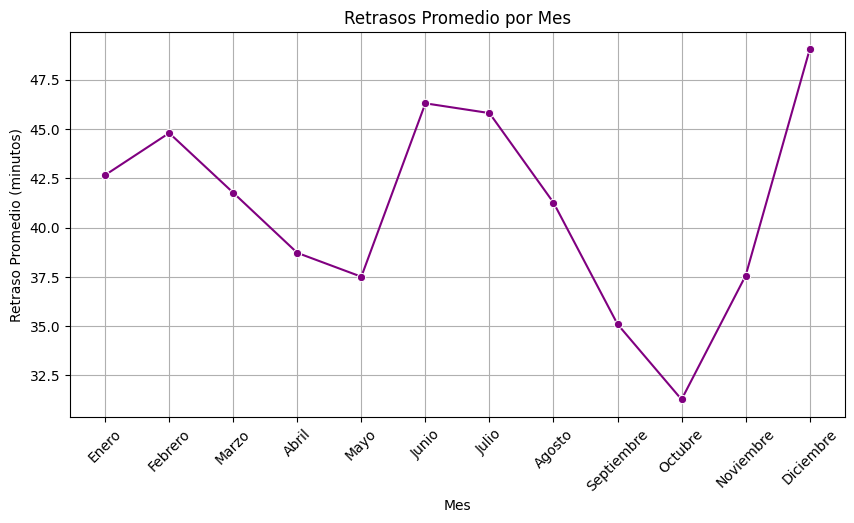

In [ ]:
# Agrupar por mes y calcular el retraso promedio
monthly_delays = df.groupby('Month')['ArrDelay'].mean()

# Graficar
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_delays.index, y=monthly_delays.values, marker="o", color="purple")
plt.xlabel("Mes")
plt.ylabel("Retraso Promedio (minutos)")
plt.title("Retrasos Promedio por Mes")
plt.xticks(range(1, 13), ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                           'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.grid()
plt.show()


Mapa de calor de retrasos por hora del día. En qué horarios hay más retrasos.

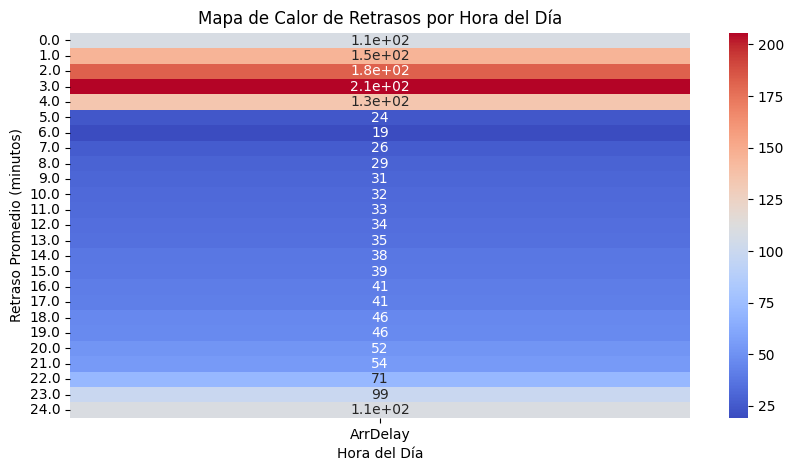

In [ ]:
import numpy as np

# Crear una columna de hora de salida redondeada
df['Hour'] = df['DepTime'] // 100

# Agrupar por hora de salida y calcular el retraso promedio
hourly_delays = df.groupby('Hour')['ArrDelay'].mean().reset_index()

# Crear mapa de calor
plt.figure(figsize=(10, 5))
sns.heatmap(hourly_delays.pivot_table(index='Hour', values='ArrDelay'), cmap="coolwarm", annot=True)
plt.xlabel("Hora del Día")
plt.ylabel("Retraso Promedio (minutos)")
plt.title("Mapa de Calor de Retrasos por Hora del Día")
plt.show()


# **Creación de un Dashboard Interactivo con Dash**

Paso 1: Instalar Dependencias

In [19]:
pip install dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [20]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Cargar el dataset
file_path = 'DelayedFlights.csv'  # Cambia la ruta si es necesario
df = pd.read_csv(file_path)

# Inicializar la aplicación Dash
app = dash.Dash(__name__)

# Layout de la aplicación
app.layout = html.Div([
    html.H1('Dashboard de Retrasos de Aerolíneas'),
    dcc.Dropdown(
        id='month-dropdown',
        options=[{'label': f'Mes {i}', 'value': i} for i in range(1, 13)],
        value=1,  # valor inicial
        style={'width': '50%'}
    ),
    dcc.Graph(id='delay-graph')
])

# Función para actualizar el gráfico
@app.callback(
    Output('delay-graph', 'figure'),
    [Input('month-dropdown', 'value')]
)
def update_graph(selected_month):
    # Filtrar los datos por el mes seleccionado
    filtered_df = df[df['Month'] == selected_month]

    if filtered_df.empty:
        return {}

    # Calcular retrasos promedio por aerolínea
    airline_delays = filtered_df.groupby('UniqueCarrier')['ArrDelay'].mean().sort_values(ascending=False)

    # Crear gráfico interactivo
    fig = px.bar(airline_delays, x=airline_delays.index, y=airline_delays.values,
                 labels={'x': 'Aerolínea', 'y': 'Retraso Promedio (min)'},
                 title=f'Retraso Promedio por Aerolínea en el Mes {selected_month}',
                 color=airline_delays.values, color_continuous_scale='Blues')

    return fig

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>